# Ethics attitudes
This notebook is for analyzing the data regarding ethics attitudes. 

In [1]:
import pandas as pd
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import starbars 

import os
import sys
import yaml
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from scripts import utils

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.1f" # plotting shows % with 2 decimals

# ignore plotting warnings to save space
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Vars
courses_cg = ["COMP202", "COMP250"]
courses_ee = ["COMP251", "COMP424", "COMP551"]
courses = courses_cg + courses_ee

deg_type = ["Undergraduate", "Graduate"]
years = ["U0", "U1", "U2", "U3", "U4+", "M1", "M2", "M3+", "PhD1", "PhD2", "PhD3", "PhD4", "PhD5+"]
majors = ["CS/SWE major", "CS/SWE minor", "Other"]
genders = ["Man", "Woman", "Other", "Prefer not to answer"]
minorities = ["Yes", "No", "Prefer not to answer"]
age = ["<18", "18-24", "25-34", "35-44", ">45", "Prefer not to answer"]
ethics_knowledge = ["Yes", "No"]
likert = range(1, 8)
likert_values = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]
attitudes = ["Interest", "Value", "Self-efficacy", "Responsibility"]

# current semester (for script purposes)
semester = "F2025"

In [3]:
data_dir = os.path.join(project_root, 'data')

ee_file = "F2025_ee_clean.csv"
cg_file = "F2025_cg_clean.csv"
questions_file = f"{semester}_survey.yaml"

ee_data_path = os.path.join(data_dir, 'clean', ee_file)
cg_data_path = os.path.join(data_dir, 'clean', cg_file)

In [4]:
ee_data_full = pd.read_csv(ee_data_path, header=[0,1], index_col=0)

# remove rows with students who did not attend EE
ee_data = ee_data_full[ee_data_full["EE course"]["None"] == 0]

cg_data_full = pd.read_csv(cg_data_path, header=[0,1], index_col=0)
# add the students who did not attend EE
cg_data = pd.concat([cg_data_full, ee_data_full[ee_data_full["EE course"]["None"] == 1]], axis=0)

data_all = [ee_data, cg_data]

# rebuild the multiindexing properly to make data access easier
for d in data_all:
    utils.rebuild_multiindex(d)

# get survey questions
with open(os.path.join(data_dir, questions_file), 'r') as yaml_file:
    questions = yaml.safe_load(yaml_file)

In [5]:
'''
course_data = {}
for course in courses:
    if course in courses_ee:
        course_data[course] = ee_data[ee_data["EE course"][course] == 1]

        # TODO: test  - for people in CG who are in EE group
        
        if course in cg_data["EE course"].columns:
            course_data[course] = pd.concat([course_data[course], cg_data[cg_data["EE course"][course] == 1]])
        
    else:
        course_data[course] = cg_data[cg_data["CG course"][course] == 1]
        
course_data["None"] = ee_data_full[ee_data_full["EE course"]["None"] == 1]
'''

'\ncourse_data = {}\nfor course in courses:\n    if course in courses_ee:\n        course_data[course] = ee_data[ee_data["EE course"][course] == 1]\n\n        # TODO: test  - for people in CG who are in EE group\n\n        if course in cg_data["EE course"].columns:\n            course_data[course] = pd.concat([course_data[course], cg_data[cg_data["EE course"][course] == 1]])\n\n    else:\n        course_data[course] = cg_data[cg_data["CG course"][course] == 1]\n\ncourse_data["None"] = ee_data_full[ee_data_full["EE course"]["None"] == 1]\n'

## Likert plots per attitude question


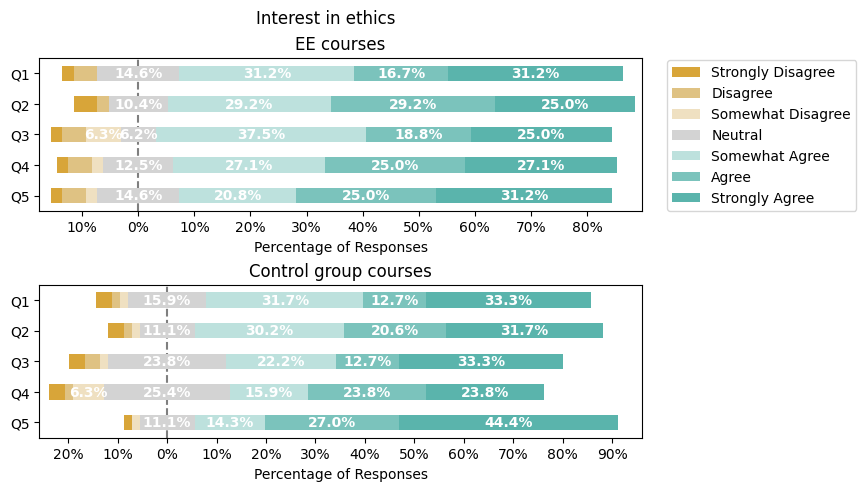

Q1: I am interested in learning more about ethical issues in technology
Q2: I am interested in learning more about ethical issues in technology
Q3: I am interested in learning more about ethical issues in technology
Q4: I am interested in learning more about ethical issues in technology
Q5: I am interested in learning more about ethical issues in technology


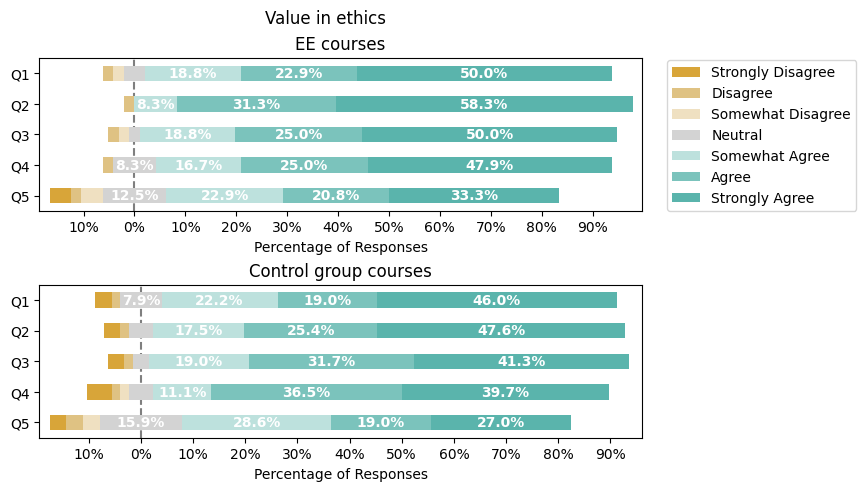

Q1: All computer science students should learn about ethical issues arising from technology as part of their computer science program
Q2: All computer science students should learn about ethical issues arising from technology as part of their computer science program
Q3: All computer science students should learn about ethical issues arising from technology as part of their computer science program
Q4: All computer science students should learn about ethical issues arising from technology as part of their computer science program
Q5: All computer science students should learn about ethical issues arising from technology as part of their computer science program


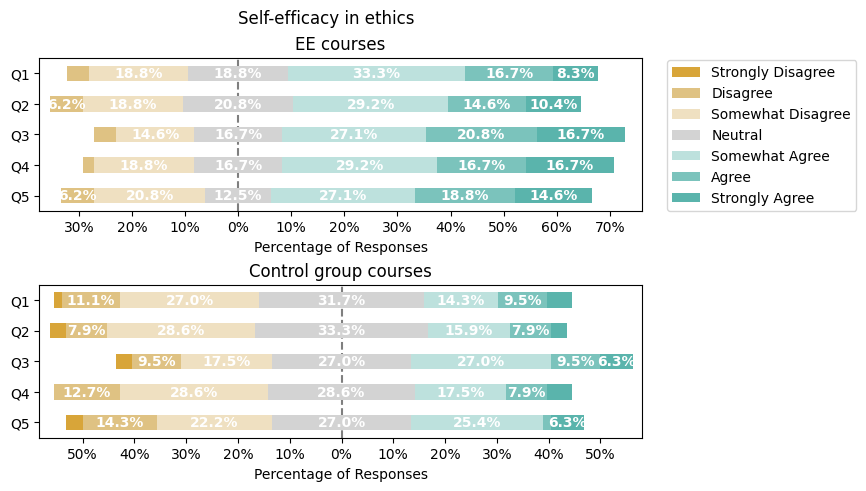

Q1: I feel equipped to identify ethical issues arising from technology
Q2: I feel equipped to identify ethical issues arising from technology
Q3: I feel equipped to identify ethical issues arising from technology
Q4: I feel equipped to identify ethical issues arising from technology
Q5: I feel equipped to identify ethical issues arising from technology


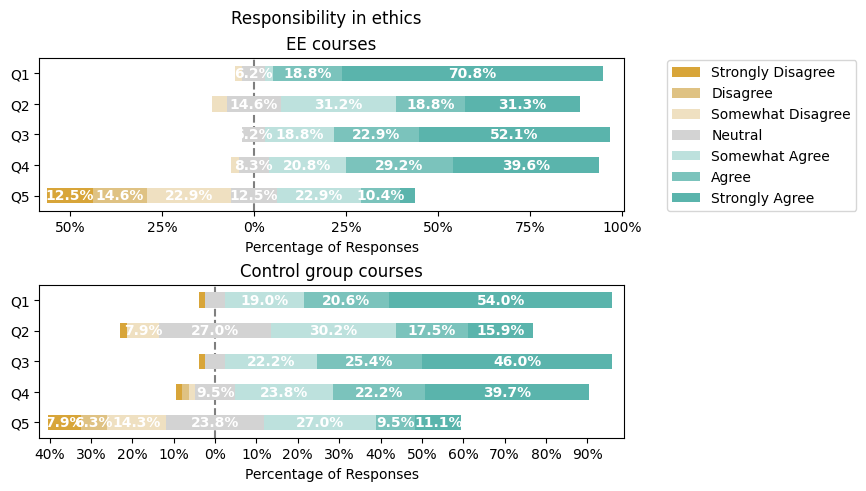

Q1: Technology is having an impact on society that raises ethical issues
Q2: Technology is having an impact on society that raises ethical issues
Q3: Technology is having an impact on society that raises ethical issues
Q4: Technology is having an impact on society that raises ethical issues
Q5: Technology is having an impact on society that raises ethical issues


In [6]:
for attitude in attitudes:
    utils.likert_plot_attitudes(ee_data, cg_data, attitude)
    print(f"Q1: {questions[f"{attitude} Q1"]}\nQ2: {questions[f"{attitude} Q1"]}\nQ3: {questions[f"{attitude} Q1"]}\nQ4: {questions[f"{attitude} Q1"]}\nQ5: {questions[f"{attitude} Q1"]}")

## Average per attitude EE vs CG
Note that it is also possible to take the sum of all the questions and this will give the exact same graph. This is because the sum will be Q1+Q2+Q3+Q4+Q5, whereas the average is that sum divided by 5. 

#### T-test
Testing for significant differences in the average attitude between EE and controls.

First, compute the average attitude score for each respondent

In [7]:
attitude_avgs = []
for d in data_all:
    avgs_dict = {}
    for attitude in attitudes:
        avgs_dict[attitude] = d[attitude].mean(axis=1)
    attitude_avgs.append(pd.DataFrame(avgs_dict))

attitude_avgs_ee, attitude_avgs_cg = attitude_avgs[0], attitude_avgs[1]

1. Test equal variance in data (Levene test)

Note that the `pingouin`'s `homoscedasticity` function can only take in dataframes, lists, or numpy arrays.

In [ ]:
equal_var_attitudes_avg = utils.equal_var_test(attitude_avgs_ee, attitude_avgs_cg, attitudes)
display(equal_var_attitudes_avg)

,W,pval,equal_var
Interest,0.096661,0.756468,True
Value,0.701441,0.404132,True
Self-efficacy,1.553985,0.215220,True
Responsibility,2.694907,0.103552,True


2. Test for normal distribution of data (Shapiro-Wilk)

In [9]:
ind_dict = {0:"EE", 1:"Control"}

for i, d in enumerate(attitude_avgs):
    norm_test = pg.normality(d, method="shapiro")
    print(f"Normality test for {ind_dict[i]} group")
    display(norm_test)

Normality test for EE group


,W,pval,normal
Interest,0.885933,0.000228,False
Value,0.840784,0.000012,False
Self-efficacy,0.969428,0.240632,True
Responsibility,0.968668,0.224681,True


Normality test for Control group


,W,pval,normal
Interest,0.928945,1.325698e-03,False
Value,0.801458,8.633238e-08,False
Self-efficacy,0.977328,2.958848e-01,True
Responsibility,0.927714,1.172660e-03,False


3. Perform t-test

We perform parametric and non-parametric. Non-parametric is appropriate for data that is not normally distributed.

In [ ]:
ttest_attitudes_avg, mwu_attitudes_avg = utils.ttest(attitude_avgs_ee, attitude_avgs_cg, attitudes)

print("Parametric t-test")
display(ttest_attitudes_avg)
print("Non-parametric t-test (Mann-Whitney U Test)")
display(mwu_attitudes_avg)

Parametric t-test


,T,dof,alternative,p-val,significance,CI95%,cohen-d,BF10,power
Interest,-0.232101,98.118677,two-sided,0.816943,ns,"[-0.54, 0.43]",0.044825,0.208,0.056184
Value,1.098876,108.977617,two-sided,0.274244,ns,"[-0.2, 0.68]",0.203355,0.348,0.183267
Self-efficacy,3.593016,95.328778,two-sided,0.000519,***,"[0.36, 1.25]",0.698383,53.929,0.950829
Responsibility,0.779561,108.941736,two-sided,0.437340,ns,"[-0.19, 0.44]",0.144427,0.266,0.116005


Non-parametric t-test (Mann-Whitney U Test)


,U-val,alternative,p-val,significance,RBC,CLES
Interest,1510.5,two-sided,0.995233,ns,-0.000992,0.499504
Value,1637.5,two-sided,0.452742,ns,0.083003,0.541501
Self-efficacy,2087.0,two-sided,0.000615,***,0.380291,0.690146
Responsibility,1630.0,two-sided,0.482740,ns,0.078042,0.539021


4. Plot results of t-test to visualize

In [11]:
# help by chatgpt :)
attitude_avgs_ee = attitude_avgs_ee.assign(Group="EE group")
attitude_avgs_cg = attitude_avgs_cg.assign(Group="Control group")

# combine both dataframes for easy plotting
attitude_avgs_df = pd.concat([attitude_avgs_ee, attitude_avgs_cg])
attitude_avgs_df = attitude_avgs_df.melt(id_vars="Group", var_name="attitude", value_name="avg attitude score")

4.0 0.03


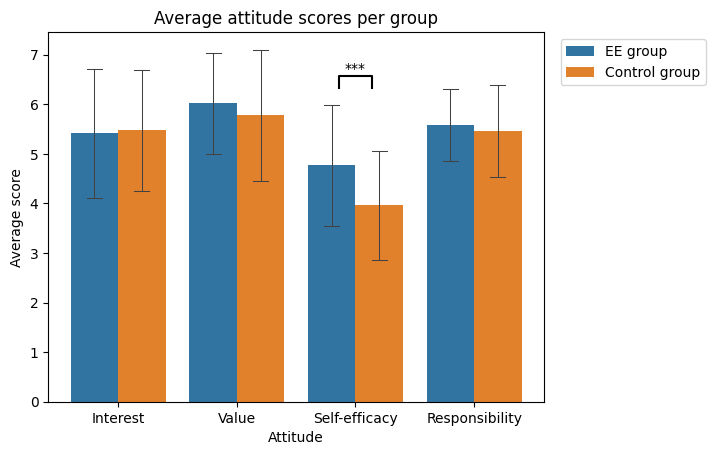

In [54]:
ax = sns.barplot(
    data=attitude_avgs_df,
    x="attitude",
    y="avg attitude score",
    hue="Group" ,
    estimator="mean",
    errorbar="sd",
    capsize=0.25,
    errwidth=0.75
)

ax.set_title("Average attitude scores per group")
ax.set_xlabel("Attitude")
ax.set_ylabel("Average score")
ax.legend(loc='upper right', bbox_to_anchor=(1.34, 1))

# p-values stars
annotations = [(("EE group", "Self-efficacy"), ("Control group", "Self-efficacy"), 0.000615)]
starbars.draw_annotation(annotations, bar_gap=-0.15)

## Attitude differences for each question, EE vs CG

----------- T-testing for Interest -----------


,W,pval,equal_var
Q1,0.004557,0.946304,True
Q2,0.115359,0.734777,True
Q3,1.141768,0.287640,True
Q4,0.612785,0.435438,True
Q5,1.304741,0.255852,True


Normality test for EE group


,W,pval,normal
Q1,0.861503,0.000045,False
Q2,0.831637,0.000007,False
Q3,0.874494,0.000104,False
Q4,0.872168,0.000089,False
Q5,0.863002,0.000049,False


Normality test for Control group


,W,pval,normal
Q1,0.854515,2.625449e-06,False
Q2,0.845313,1.385760e-06,False
Q3,0.867513,6.738621e-06,False
Q4,0.898758,8.136061e-05,False
Q5,0.791307,4.793951e-08,False


Parametric t-test


,T,dof,alternative,p-val,significance,CI95%,cohen-d,BF10,power
Q1,0.031784,102.029086,two-sided,0.974707,ns,"[-0.55, 0.57]",0.006078,0.203,0.050113
Q2,-0.237351,101.024723,two-sided,0.812865,ns,"[-0.61, 0.48]",0.045509,0.208,0.056374
Q3,-0.034042,104.668888,two-sided,0.972908,ns,"[-0.59, 0.57]",0.006458,0.203,0.050128
Q4,0.902613,103.893504,two-sided,0.368819,ns,"[-0.31, 0.82]",0.171668,0.292,0.144099
Q5,-1.760078,91.214968,two-sided,0.081747,ns,"[-1.01, 0.06]",0.345197,0.805,0.430990


Non-parametric t-test (Mann-Whitney U Test)


,U-val,alternative,p-val,significance,RBC,CLES
Q1,1520.5,two-sided,0.960575,ns,0.005622,0.502811
Q2,1476.0,two-sided,0.826936,ns,-0.023810,0.488095
Q3,1516.0,two-sided,0.982873,ns,0.002646,0.501323
Q4,1672.5,two-sided,0.329226,ns,0.106151,0.553075
Q5,1230.5,two-sided,0.080705,ns,-0.186177,0.406911


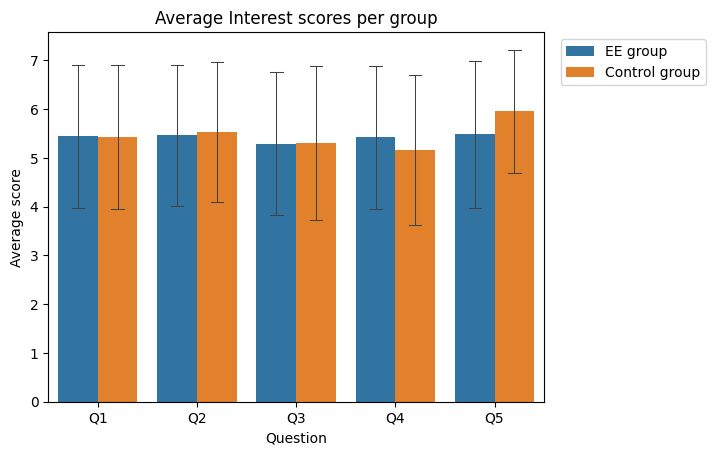

----------- T-testing for Value -----------


,W,pval,equal_var
Q1,0.700295,0.404515,True
Q2,4.417276,0.037881,False
Q3,0.006128,0.937746,True
Q4,0.085286,0.770813,True
Q5,0.071551,0.789597,True


Normality test for EE group


,W,pval,normal
Q1,0.768972,2.764258e-07,False
Q2,0.636935,1.195610e-09,False
Q3,0.755980,1.500379e-07,False
Q4,0.785152,6.094694e-07,False
Q5,0.852629,2.555355e-05,False


Normality test for Control group


,W,pval,normal
Q1,0.767232,1.271055e-08,False
Q2,0.725031,1.509991e-09,False
Q3,0.732461,2.161972e-09,False
Q4,0.720520,1.218079e-09,False
Q5,0.882579,2.145139e-05,False


Parametric t-test


,T,dof,alternative,p-val,significance,CI95%,cohen-d,BF10,power
Q1,0.909838,108.301622,two-sided,0.364928,ns,"[-0.27, 0.72]",0.169817,0.294,0.142027
Q2,1.973347,107.141511,two-sided,0.051031,ns,"[-0.0, 0.87]",0.358524,1.143,0.458200
Q3,0.798246,107.637256,two-sided,0.426485,ns,"[-0.28, 0.66]",0.149620,0.27,0.120962
Q4,0.872430,108.998561,two-sided,0.384891,ns,"[-0.28, 0.72]",0.161229,0.285,0.132722
Q5,0.506848,98.582337,two-sided,0.613393,ns,"[-0.44, 0.75]",0.097778,0.228,0.079795


Non-parametric t-test (Mann-Whitney U Test)


,U-val,alternative,p-val,significance,RBC,CLES
Q1,1623.5,two-sided,0.479518,ns,0.073743,0.536872
Q2,1767.5,two-sided,0.096324,ns,0.168981,0.584491
Q3,1632.5,two-sided,0.445859,ns,0.079696,0.539848
Q4,1601.0,two-sided,0.575526,ns,0.058862,0.529431
Q5,1628.0,two-sided,0.479444,ns,0.076720,0.538360


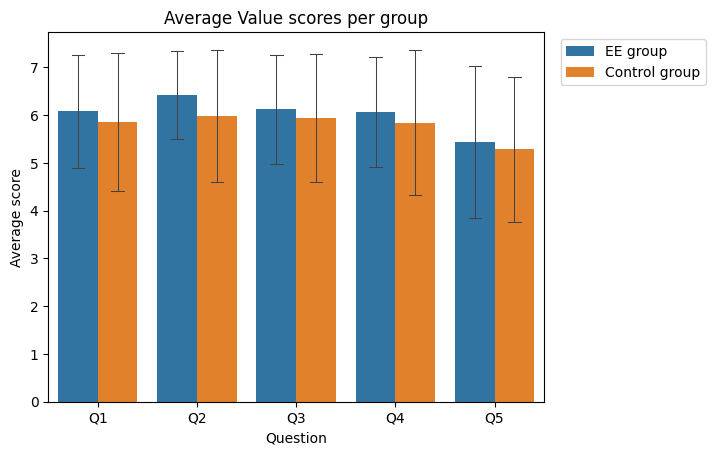

----------- T-testing for Self-efficacy -----------


,W,pval,equal_var
Q1,0.000850,0.976795,True
Q2,1.027599,0.312968,True
Q3,0.006549,0.935651,True
Q4,0.298847,0.585724,True
Q5,0.545641,0.461692,True


Normality test for EE group


,W,pval,normal
Q1,0.934190,0.009762,False
Q2,0.936903,0.012358,False
Q3,0.926876,0.005240,False
Q4,0.920033,0.002981,False
Q5,0.921360,0.003321,False


Normality test for Control group


,W,pval,normal
Q1,0.935996,0.002721,False
Q2,0.940052,0.004169,False
Q3,0.951155,0.014069,False
Q4,0.919798,0.000543,False
Q5,0.936139,0.002762,False


Parametric t-test


,T,dof,alternative,p-val,significance,CI95%,cohen-d,BF10,power
Q1,2.781864,102.869061,two-sided,0.006430,**,"[0.2, 1.22]",0.530698,6.069,0.783932
Q2,2.744236,96.866247,two-sided,0.007228,**,"[0.2, 1.22]",0.531542,5.551,0.785209
Q3,2.799841,101.555756,two-sided,0.006121,**,"[0.22, 1.31]",0.536078,6.337,0.791996
Q4,3.663328,97.923255,two-sided,0.000404,***,"[0.44, 1.48]",0.707815,66.647,0.955598
Q5,3.121849,97.531763,two-sided,0.002365,**,"[0.32, 1.43]",0.603748,14.289,0.877671


Non-parametric t-test (Mann-Whitney U Test)


,U-val,alternative,p-val,significance,RBC,CLES
Q1,1966.5,two-sided,0.005691,**,0.300595,0.650298
Q2,1946.0,two-sided,0.008175,**,0.287037,0.643519
Q3,1951.0,two-sided,0.007723,**,0.290344,0.645172
Q4,2082.0,two-sided,0.000534,***,0.376984,0.688492
Q5,2004.0,two-sided,0.002831,**,0.325397,0.662698


5.0 0.03
5.0 0.03
5.0 0.03
5.0 0.03
5.0 0.03


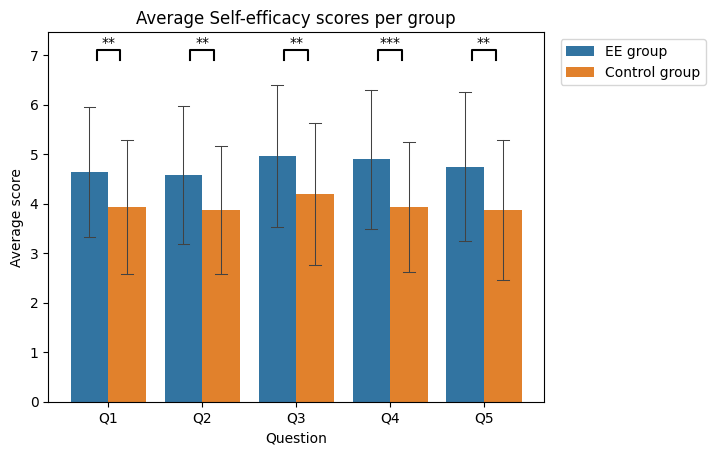

----------- T-testing for Responsibility -----------


,W,pval,equal_var
Q1,2.513774,0.115752,True
Q2,0.166916,0.683668,True
Q3,0.163990,0.686303,True
Q4,1.420607,0.235892,True
Q5,0.707059,0.402263,True


Normality test for EE group


,W,pval,normal
Q1,0.580962,1.762165e-10,False
Q2,0.878190,1.335663e-04,False
Q3,0.771446,3.112596e-07,False
Q4,0.841144,1.275906e-05,False
Q5,0.938899,1.472482e-02,False


Normality test for Control group


,W,pval,normal
Q1,0.722768,1.355340e-09,False
Q2,0.920368,5.732982e-04,False
Q3,0.764818,1.118083e-08,False
Q4,0.824964,3.631182e-07,False
Q5,0.939507,3.934442e-03,False


Parametric t-test


,T,dof,alternative,p-val,significance,CI95%,cohen-d,BF10,power
Q1,1.621698,107.755028,two-sided,0.107791,ns,"[-0.07, 0.72]",0.303762,0.655,0.349052
Q2,2.451504,104.847946,two-sided,0.015879,*,"[0.11, 1.06]",0.464822,2.879,0.671759
Q3,0.725269,107.579828,two-sided,0.469862,ns,"[-0.25, 0.54]",0.135983,0.257,0.108346
Q4,0.789600,108.703353,two-sided,0.431480,ns,"[-0.27, 0.63]",0.146838,0.268,0.118283
Q5,-1.921347,99.574475,two-sided,0.057548,ns,"[-1.26, 0.02]",0.369756,1.046,0.481295


Non-parametric t-test (Mann-Whitney U Test)


,U-val,alternative,p-val,significance,RBC,CLES
Q1,1785.0,two-sided,0.062906,ns,0.180556,0.590278
Q2,1893.5,two-sided,0.019568,*,0.252315,0.626157
Q3,1605.0,two-sided,0.553041,ns,0.061508,0.530754
Q4,1585.0,two-sided,0.650915,ns,0.048280,0.524140
Q5,1206.0,two-sided,0.064558,ns,-0.202381,0.398810


5.0 0.03


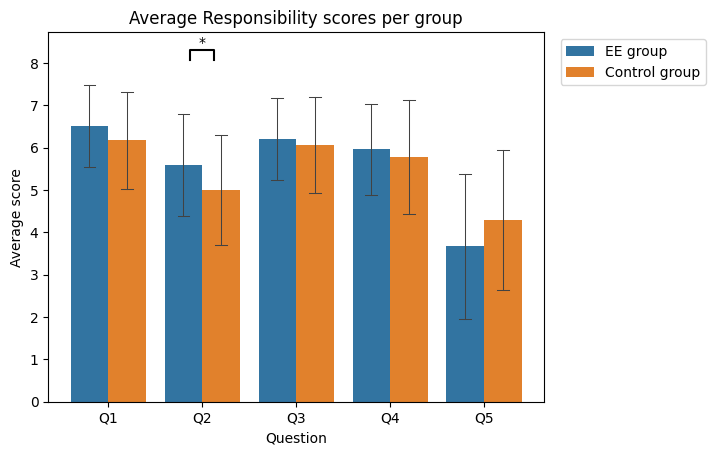

In [66]:
questions = ["Q" + str(i) for i in range(1, 6)]
for attitude in attitudes:
    print(f"----------- T-testing for {attitude} -----------")
    attitude_ee, attitude_cg = ee_data[attitude], cg_data[attitude]
    attitude_all = [attitude_ee, attitude_cg]

    # test variance
    equal_var = utils.equal_var_test(attitude_ee, attitude_cg, questions)
    display(equal_var)

    # test normality
    for i, d in enumerate(attitude_all):
        norm_test = pg.normality(d, method="shapiro")
        print(f"Normality test for {ind_dict[i]} group")
        display(norm_test)

    # perform t-test
    ttest_attitude, mwu_attitude = utils.ttest(attitude_ee, attitude_cg, questions)
    print("Parametric t-test")
    display(ttest_attitude)
    print("Non-parametric t-test (Mann-Whitney U Test)")
    display(mwu_attitude)

    # plot
    attitude_ee = attitude_ee.assign(Group="EE group")
    attitude_cg = attitude_cg.assign(Group="Control group")
    attitude_df = pd.concat([attitude_ee, attitude_cg])
    attitude_df = attitude_df.melt(id_vars="Group", var_name="questions", value_name="score")

    ax = sns.barplot(
        data=attitude_df,
        x="questions",
        y="score",
        hue="Group" ,
        estimator="mean",
        errorbar="sd",
        capsize=0.25,
        errwidth=0.75
    )

    ax.set_title(f"Average {attitude} scores per group")
    ax.set_xlabel("Question")
    ax.set_ylabel("Average score")
    ax.legend(loc='upper right', bbox_to_anchor=(1.34, 1))

    # p-values stars
    annotations = [(("EE group", "Q1"), ("Control group", "Q1"), mwu_attitude["p-val"]["Q1"]),
                   (("EE group", "Q2"), ("Control group", "Q2"), mwu_attitude["p-val"]["Q2"]),
                   (("EE group", "Q3"), ("Control group", "Q3"), mwu_attitude["p-val"]["Q3"]),
                   (("EE group", "Q4"), ("Control group", "Q4"), mwu_attitude["p-val"]["Q4"]),
                   (("EE group", "Q5"), ("Control group", "Q5"), mwu_attitude["p-val"]["Q5"]),]
    starbars.draw_annotation(annotations, ns_show=False)
    plt.show()

## Comparison with UofT

Comparision with [2022 paper](https://doi.org/10.1145/3478431.3499407). 

In [13]:
mcgill_ee_data_2022 = pd.concat([ee_data["Interest"][["Q1", "Q5"]], ee_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]], axis=1)
mcgill_cg_data_2022 = pd.concat([cg_data["Interest"][["Q1", "Q5"]], cg_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]], axis=1)

mcgill_ee_avg_2022 = mcgill_ee_data_2022.sum(axis=1).mean()
mcgill_cg_avg_2022 = mcgill_cg_data_2022.sum(axis=1).mean()

mcgill_ee_std_2022 = mcgill_ee_data_2022.sum(axis=1).std()
mcgill_cg_std_2022 = mcgill_cg_data_2022.sum(axis=1).std()

# post data for UofT
uoft_ee_avg_2022 = 32.39
uoft_cg_avg_2022 = 28.21

uoft_ee_std_2022 = 5.87
uoft_cg_std_2022 = 7.15

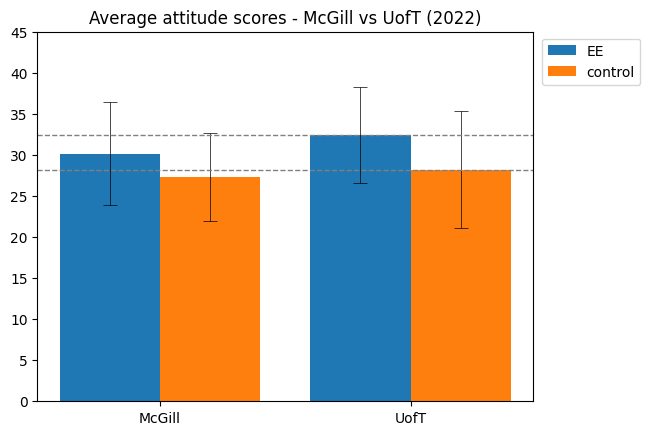

In [14]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_avg_2022, uoft_ee_avg_2022], width=bar_width, label="EE", yerr=[mcgill_ee_std_2022, uoft_ee_std_2022], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_avg_2022, uoft_cg_avg_2022], width=bar_width, label="control",yerr=[mcgill_cg_std_2022, uoft_cg_std_2022], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_avg_2022, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_avg_2022, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 46, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average attitude scores - McGill vs UofT (2022)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Does McGill have a statistically significant difference between EE and CG group?

In [15]:
pg_stats = pg.ttest(mcgill_ee_data_2022.sum(axis=1), mcgill_cg_data_2022.sum(axis=1))
print(f"T-test for EASE")
display(pg_stats)

T-test for EASE


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.510508,92.133975,two-sided,0.013799,"[0.6, 5.1]",0.491406,3.268,0.719813


Comparison with 2023 paper.

In [16]:
mcgill_ee_attitude_data_2023 = pd.concat([ee_data["Interest"][["Q1", "Q5"]], ee_data["Value"][["Q1", "Q2"]], ee_data["Responsibility"][["Q1"]]], axis=1)
mcgill_cg_attitude_data_2023 = pd.concat([cg_data["Interest"][["Q1", "Q5"]], cg_data["Value"][["Q1", "Q2"]], cg_data["Responsibility"][["Q1"]]], axis=1)
mcgill_ee_se_data_2023 = ee_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]
mcgill_cg_se_data_2023 = cg_data["Self-efficacy"][["Q1", "Q3", "Q4", "Q5"]]

mcgill_ee_attitude_avg_2023 = mcgill_ee_attitude_data_2023.sum(axis=1).mean()
mcgill_cg_attitude_avg_2023 = mcgill_cg_attitude_data_2023.sum(axis=1).mean()
mcgill_ee_se_avg_2023 = mcgill_ee_se_data_2023.sum(axis=1).mean()
mcgill_cg_se_avg_2023 = mcgill_cg_se_data_2023.sum(axis=1).mean()

mcgill_ee_attitude_std_2023 = mcgill_ee_attitude_data_2023.sum(axis=1).std()
mcgill_cg_attitude_std_2023 = mcgill_cg_attitude_data_2023.sum(axis=1).std()
mcgill_ee_se_std_2023 = mcgill_ee_se_data_2023.sum(axis=1).std()
mcgill_cg_se_std_2023 = mcgill_cg_se_data_2023.sum(axis=1).std()

# post data for UofT
uoft_ee_attitude_avg_2023 = 28.22
uoft_cg_attitude_avg_2023 = 27.02
uoft_ee_se_avg_2023 = 19.52
uoft_cg_se_avg_2023 = 17.87

uoft_ee_attitude_std_2023 = 5.28
uoft_cg_attitude_std_2023 = 5.65
uoft_ee_se_std_2023 = 4.71
uoft_cg_se_std_2023 = 4.96

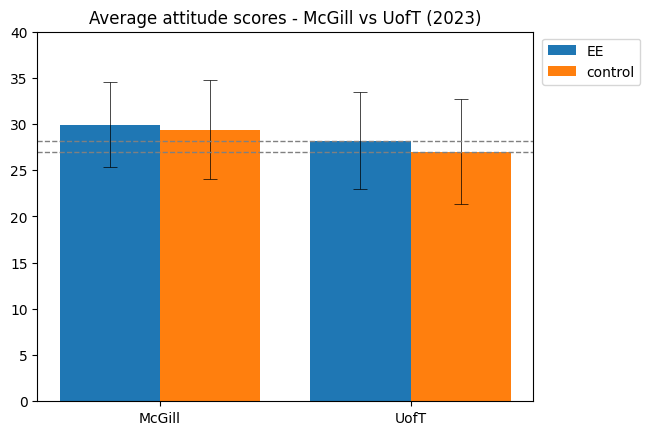

In [17]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_attitude_avg_2023, uoft_ee_attitude_avg_2023], width=bar_width, label="EE", yerr=[mcgill_ee_attitude_std_2023, uoft_ee_attitude_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_attitude_avg_2023, uoft_cg_attitude_avg_2023], width=bar_width, label="control",yerr=[mcgill_cg_attitude_std_2023, uoft_cg_attitude_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_attitude_avg_2023, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_attitude_avg_2023, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 41, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average attitude scores - McGill vs UofT (2023)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Significant difference for attitudes at McGill

In [18]:
pg_stats = pg.ttest(mcgill_ee_attitude_data_2023.sum(axis=1), mcgill_cg_attitude_data_2023.sum(axis=1))
print(f"T-test for Attitude")
display(pg_stats)

T-test for Attitude


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.549162,107.456175,two-sided,0.584033,"[-1.36, 2.4]",0.103032,0.232,0.083136


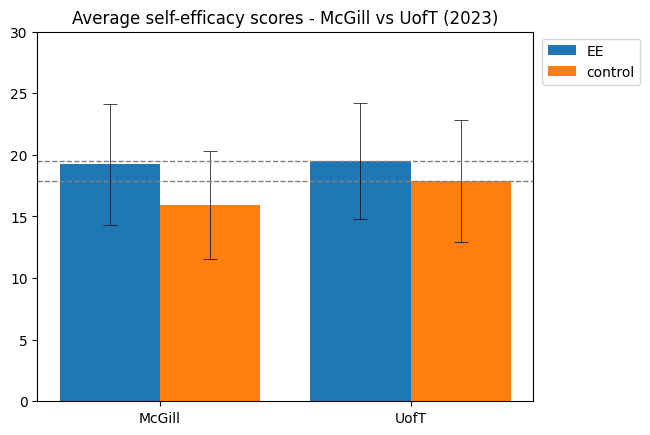

In [19]:
bar_width = 0.4
coords_mcgill = np.arange(2)
coords_uoft = [x + bar_width for x in coords_mcgill]

fig = plt.subplots()
plt.bar(coords_mcgill, [mcgill_ee_se_avg_2023, uoft_ee_se_avg_2023], width=bar_width, label="EE", yerr=[mcgill_ee_se_std_2023, uoft_ee_se_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})
plt.bar(coords_uoft, [mcgill_cg_se_avg_2023, uoft_cg_se_avg_2023], width=bar_width, label="control",yerr=[mcgill_cg_se_std_2023, uoft_cg_se_std_2023], capsize=5,
            error_kw={'elinewidth':0.5, 'capthick':0.5})

plt.axhline(y=uoft_ee_se_avg_2023, linewidth=1, linestyle='dashed', color='grey')
plt.axhline(y=uoft_cg_se_avg_2023, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(0, 31, 5))
plt.xticks(coords_mcgill + bar_width/2, ["McGill", "UofT"])
plt.title('Average self-efficacy scores - McGill vs UofT (2023)')
plt.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()


Significant difference for attitudes at McGill


In [20]:
pg_stats = pg.ttest(mcgill_ee_se_data_2023.sum(axis=1), mcgill_cg_se_data_2023.sum(axis=1))
print(f"T-test for Self-Efficacy")
display(pg_stats)

T-test for Self-Efficacy


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.676429,95.25067,two-sided,0.000391,"[1.52, 5.1]",0.714721,69.355,0.958847


## Self-assessment

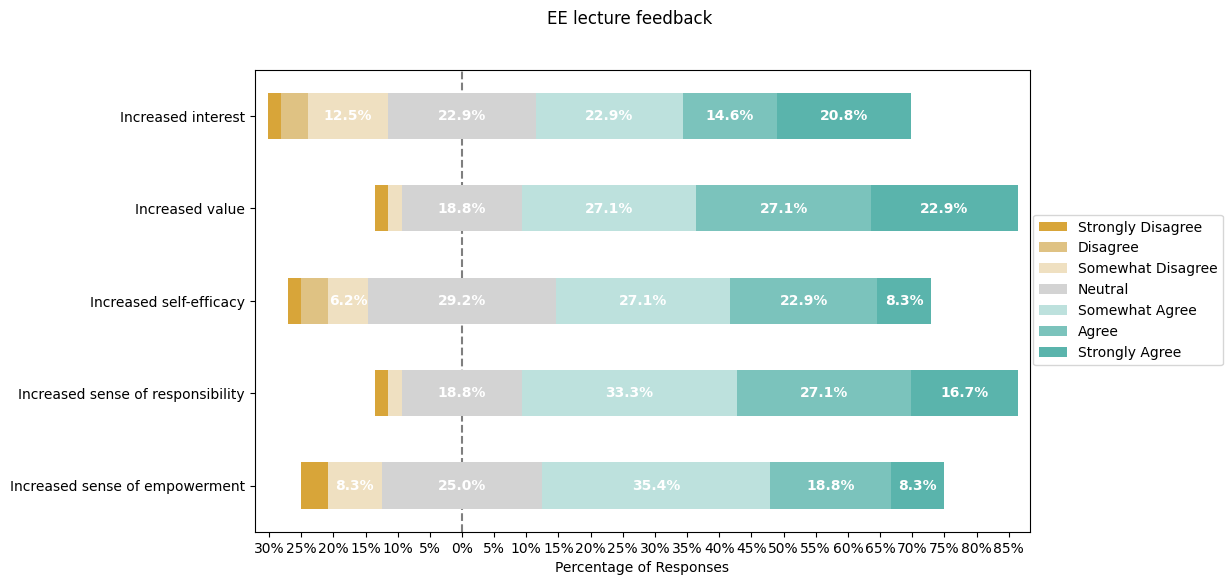

In [21]:
fig, ax = plt.subplots(figsize=(10, 6)) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Self-assessment"], likert, colors=plot_likert.colors.likert7, plot_percentage=True, bar_labels=True, legend=False, ax=ax)

fig.suptitle("EE lecture feedback")
'''
ax.set_yticklabels(["The Embedded Ethics lecture \nincreased my interest in \nlearning about ethics in \ncomputer science.",
                     "After the Embedded Ethics \nlecture, I believe more \nstrongly that all computer \nscientists should be aware \nof and able to analyze ethical \nissues arising from technology.",
                     "The Embedded Ethics lecture \nincreased my confidence \nin my ethical reasoning \nskils in computer science.",
                     "After the Embedded Ethics \nlecture, I believe more \nstrongly that computer scientists \nhave a shared responsibility \nto address ethical issues \narising from technology.",
                     "After the Embedded Ethics \nlecture, I feel more empowered \nto take steps to address \nissues arising from technology."][::-1])
'''
ax.set_yticklabels(["Increased interest",
                    "Increased value",
                    "Increased self-efficacy",
                    "Increased sense of responsibility",
                    "Increased sense of empowerment"][::-1])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.1, 0.65))

Average attitude self-reflection score

In [22]:
attitude_sr_avg = []
attitude_sr_std = []
for col in ee_data["Self-assessment"]:
    attitude_sr_avg.append(ee_data["Self-assessment"][col].mean())
    attitude_sr_std.append(ee_data["Self-assessment"][col].std())

In [23]:
x_labels = ["Interest", "Value", "Self-efficacy", "Responsibility", "Empowerment"]
pd.DataFrame({"Average": attitude_sr_avg, "StdDev": attitude_sr_std}, index=x_labels)

,Average,StdDev
Interest,4.875000,1.565927
Value,5.416667,1.285489
Self-efficacy,4.770833,1.340682
Responsibility,5.291667,1.219667
Empowerment,4.770833,1.324717


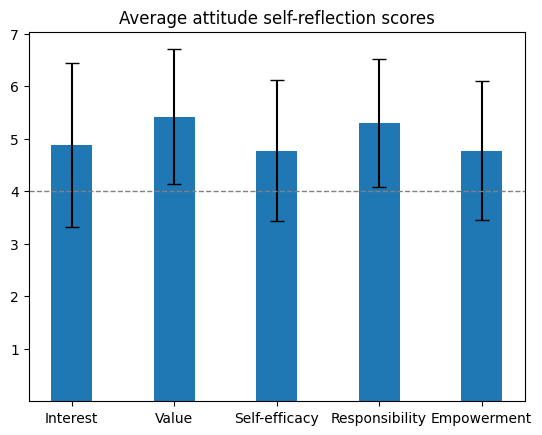

In [24]:
bar_width = 0.4

fig = plt.subplots()
plt.bar(x_labels, attitude_sr_avg, yerr=attitude_sr_std, capsize=5, width=bar_width)
plt.axhline(y=4, linewidth=1, linestyle='dashed', color='grey')

plt.yticks(range(1, 8))
plt.title('Average attitude self-reflection scores')
plt.show()


Per course

In [25]:
for col in ee_data["Self-assessment"]:
    f_stat, p_stat = stats.f_oneway(course_data["COMP251"]["Self-assessment"][col],
                                   course_data["COMP424"]["Self-assessment"][col],
                                   course_data["COMP551"]["Self-assessment"][col], 
                                   equal_var=False)
    print(f"ANOVA for {col}: f-statistic = {f_stat}, p-value = {p_stat}")

NameError: name 'stats' is not defined

Correlation between self-reflection questions

<Axes: >

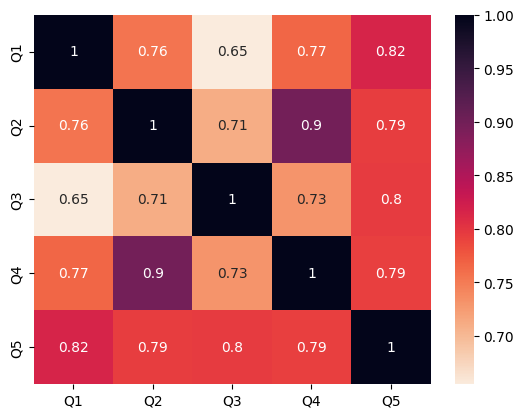

In [ ]:
corr_attitudes_sr = ee_data["Self-assessment"].corr()
sns.heatmap(corr_attitudes_sr, annot=True, cmap="rocket_r")